<a href="https://colab.research.google.com/github/YegoHome/TreyebullAI/blob/main/StableDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text-to-Image Generation using Stable Diffusion and Diffusers

In this notebook we shall learn

* how to generate images using text prompts
* the various diffusion pipelines for tasks such as text-to-image, image-to-image, text-to-music
* primary components of the diffusion pipeline: UNet model and schedulers

Diffusers library (HuggingFace): enables using SoTA diffusion models for generating images, audio, 3D structures of molecules

* Diffusion Pipeline wraps the complexity of the entire diffusion system into easy to use API

In [2]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.9 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download

base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_4step_lora.safetensors" # Use the correct ckpt for your step setting!

# Load model.
pipe = StableDiffusionXLPipeline.from_pretrained(base, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe.load_lora_weights(hf_hub_download(repo, ckpt))
pipe.fuse_lora()

# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

# Ensure using the same inference steps as the loaded model and CFG set to 0.
pipe("A girl smiling", num_inference_steps=4, guidance_scale=0).images[0].save("output.png")


/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  wa

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
!pip show torch

Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision


In [5]:
model_id = "ByteDance/SDXL-Lightning"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-65f22b18-2649c49d06558fc004590ec5;d1046711-0a7e-4be0-a674-d45359557c8a)

Entry Not Found for url: https://huggingface.co/ByteDance/SDXL-Lightning/resolve/main/model_index.json.

In [ ]:
prompt = """Sparky the Lightning Bug flies onto the page, holding a safety helmet
"""

In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



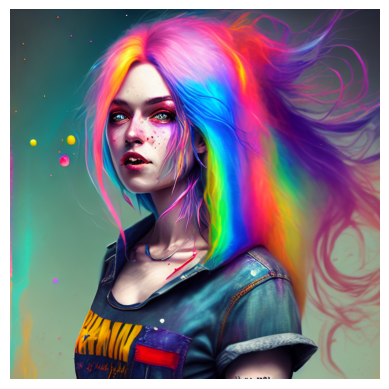

In [ ]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [ ]:
prompt2 = """Goddess Durga coming down from the heaven with a weapon in one hand and other hand in the pose of blessing. Anger and divine energy
reflecting from her eyes.
She is in the form of a soldier and savior coming to protect the world from misery. She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
Be careful to remove any extra limbs.
"""

image = pipe(prompt2).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  Goddess Durga coming down from the heaven with a weapon in one hand and other hand in the pose of blessing. Anger and divine energy 
reflecting from her eyes.
She is in the form of a soldier and savior coming to protect the world from misery. She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
Be careful to remove any extra limbs.



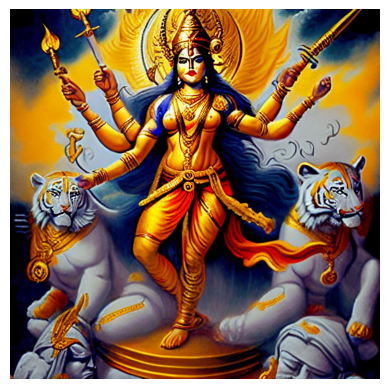

In [ ]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

https://huggingface.co/docs/diffusers/using-diffusers/loading

## Understanding diffusion models

Diffusion models have beaten GANs in image generation

2 primary components

* UNet model: takes a random noise to generate the noise residual
* Scheduler: uses the noise residual to generate a less noisy image

Pipelines such as Stable diffusion, use additional component (tokenizers) to convert the prompt to embeddings